In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


hotel_data=pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


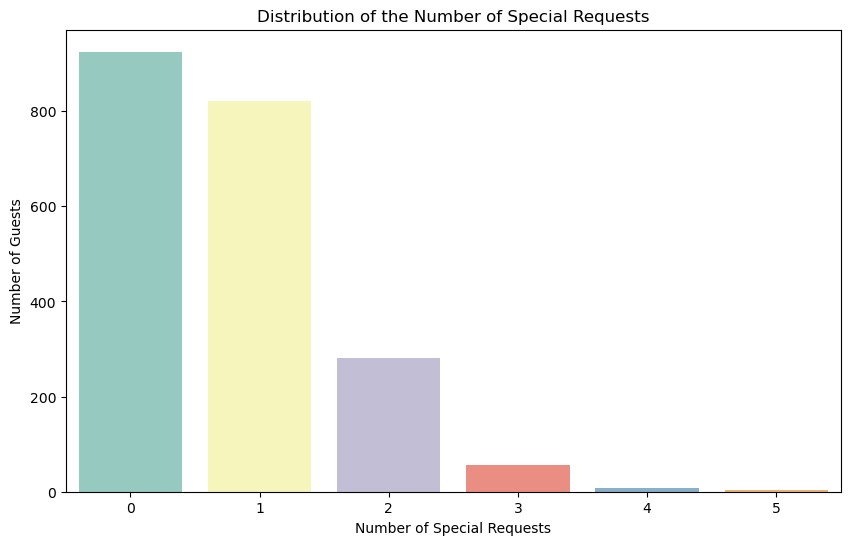

Interpretation:
 Most of the Guest atleast ask one special request and only very low number of guest only as above 3 Special Request


In [35]:
#Task 1: Customer Satisfaction
#1. What is the distribution of the number and types of special requests made by guests?
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=hotel_data, palette="Set3")
plt.title('Distribution of the Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Guests')
plt.show()
print("Interpretation:\n Most of the Guest atleast ask one special request and only very low number of guest only as above 3 Special Request")

The correlation between the number of special requests and ADR is 0.11.


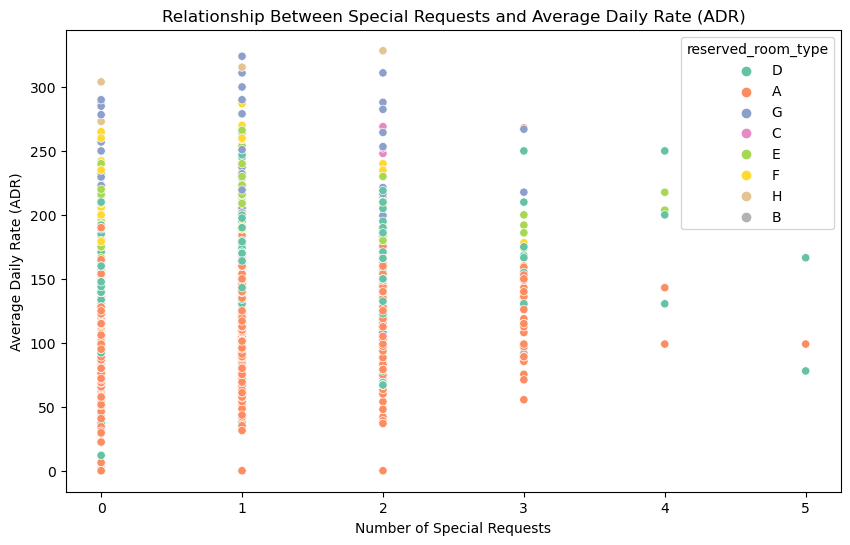

Interpretation:n\The correlation between the number of special requests and ADR is 0.11 suggests that as the number of special requests increases, the ADR also tends to increase.


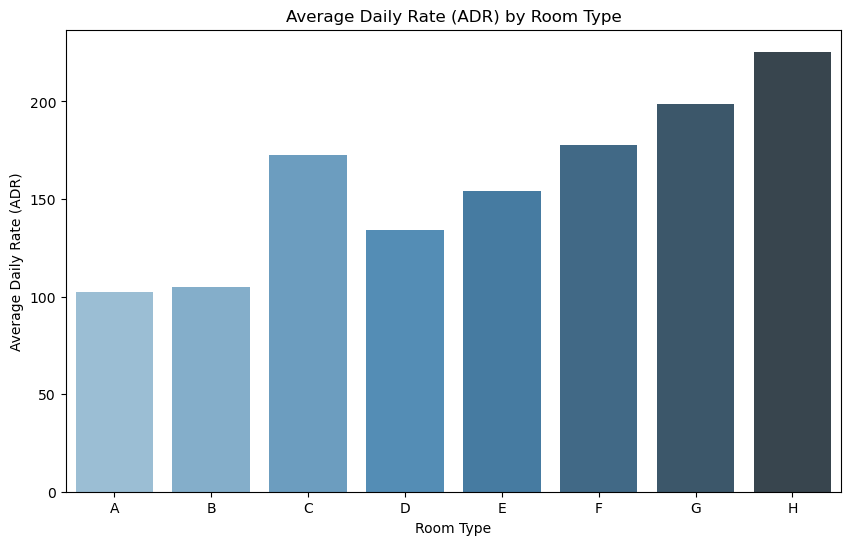

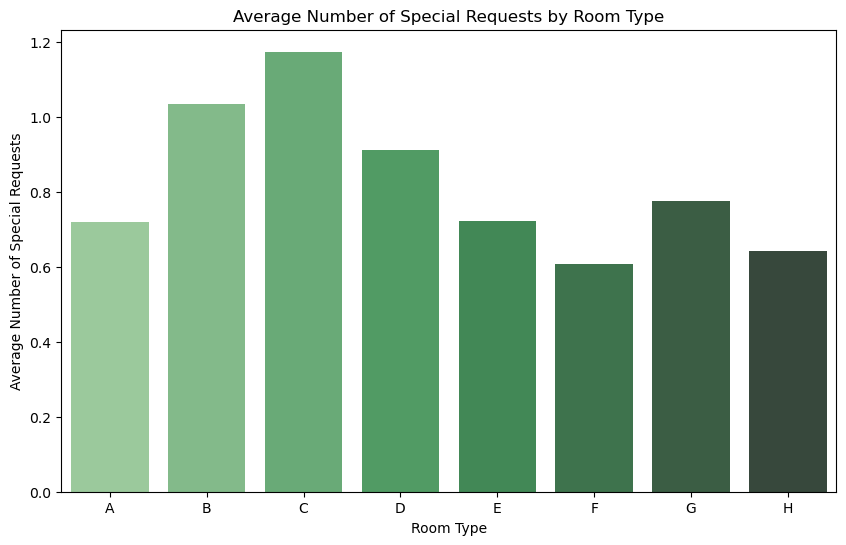

The analysis reveals that there may be a positive relationship between the number of special requests and ADR, suggesting that customers willing to pay higher rates may also expect more personalized services. Additionally, different room types show varying levels of ADR and special requests, highlighting specific customer preferences and expectations associated with premium room categories.


In [3]:
#2.Is there any relation between special requests made by customers and the average daily rate? 
correlation = hotel_data['total_of_special_requests'].corr(hotel_data['adr'])
print(f"The correlation between the number of special requests and ADR is {correlation:.2f}.")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_of_special_requests', y='adr', data=hotel_data, palette="Set2", hue='reserved_room_type')
plt.title('Relationship Between Special Requests and Average Daily Rate (ADR)')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()
print('Interpretation:n\The correlation between the number of special requests and ADR is 0.11 suggests that as the number of special requests increases, the ADR also tends to increase.')

room_type_analysis = hotel_data.groupby('reserved_room_type').agg({
    'adr': 'mean',
    'total_of_special_requests': 'mean'
}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='reserved_room_type', y='adr', data=room_type_analysis, palette="Blues_d")
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='reserved_room_type', y='total_of_special_requests', data=room_type_analysis, palette="Greens_d")
plt.title('Average Number of Special Requests by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Special Requests')
plt.show()
print('The analysis reveals that there may be a positive relationship between the number of special requests and ADR, suggesting that customers willing to pay higher rates may also expect more personalized services. Additionally, different room types show varying levels of ADR and special requests, highlighting specific customer preferences and expectations associated with premium room categories.')

In [31]:
#Task 2: Marketing and Sales Optimization
#1. Which marketing channels and market segments contribute the most to successful bookings?
successful_bookings = hotel_data[hotel_data['is_canceled'] == 0]

# Group by market segment to find the count of successful bookings
market_segment_success = successful_bookings.groupby('market_segment').size().reset_index(name='successful_bookings')

# Group by distribution channel to find the count of successful bookings
distribution_channel_success = successful_bookings.groupby('distribution_channel').size().reset_index(name='successful_bookings')

# Sort the results by the number of successful bookings in descending order
market_segment_success = market_segment_success.sort_values(by='successful_bookings', ascending=False)
distribution_channel_success = distribution_channel_success.sort_values(by='successful_bookings', ascending=False)

# Display the results
print("Market Segment Contribution to Successful Bookings")
print(market_segment_success)

print("\nDistribution Channel Contribution to Successful Bookings")
print(distribution_channel_success)
print('Interpretation:\nThe Online TA and TA/TO channels contribute the most to successful bookings, indicating that online travel agencies and traditional travel agents/tour operators are the primary drivers of successful hotel reservations.')

Market Segment Contribution to Successful Bookings
  market_segment  successful_bookings
6      Online TA                  983
3         Direct                  309
5  Offline TA/TO                  141
4         Groups                  132
2      Corporate                   29
0       Aviation                    1
1  Complementary                    1

Distribution Channel Contribution to Successful Bookings
  distribution_channel  successful_bookings
3                TA/TO                 1244
1               Direct                  308
0            Corporate                   35
2                  GDS                    9
Interpretation:
The Online TA and TA/TO channels contribute the most to successful bookings, indicating that online travel agencies and traditional travel agents/tour operators are the primary drivers of successful hotel reservations.


In [33]:
#2. Which amenities or services have the highest impact on the average daily rate (ADR)?
encoded_data = pd.get_dummies(hotel_data[['meal', 'reserved_room_type', 'market_segment']])

# Add the ADR column back to the encoded data
encoded_data['adr'] = hotel_data['adr']

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Extract the correlation of ADR with other factors
adr_correlation = correlation_matrix['adr'].sort_values(ascending=False)

# Display the correlation with ADR
print("Correlation of factors with ADR:")
print(adr_correlation)


Correlation of factors with ADR:
adr                             1.000000
reserved_room_type_G            0.323936
reserved_room_type_F            0.252443
reserved_room_type_E            0.176486
reserved_room_type_H            0.162858
meal_BB                         0.160520
market_segment_Direct           0.156347
meal_HB                         0.140643
reserved_room_type_D            0.108617
reserved_room_type_C            0.101404
market_segment_Online TA        0.081881
meal_Undefined                  0.079577
market_segment_Aviation        -0.005499
market_segment_Complementary   -0.018620
reserved_room_type_B           -0.042692
market_segment_Corporate       -0.046671
market_segment_Offline TA/TO   -0.161386
market_segment_Groups          -0.203975
meal_SC                        -0.224422
reserved_room_type_A           -0.477530
Name: adr, dtype: float64
